In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx


In [7]:
data = gpd.read_file("acs2019_5yr_B03002_14000US36047053700/acs2019_5yr_B03002_14000US36047053700.geojson")

In [11]:
# data sample
data.head()

# sample produces a random row
data.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1022,14000US36047099000,"Census Tract 990, Kings, NY",1744.0,286.0,1666.0,292.0,182.0,180.0,1345.0,270.0,...,12.0,29.0,32.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-73.90122 40.64046, -73.90050 ..."


<AxesSubplot:>

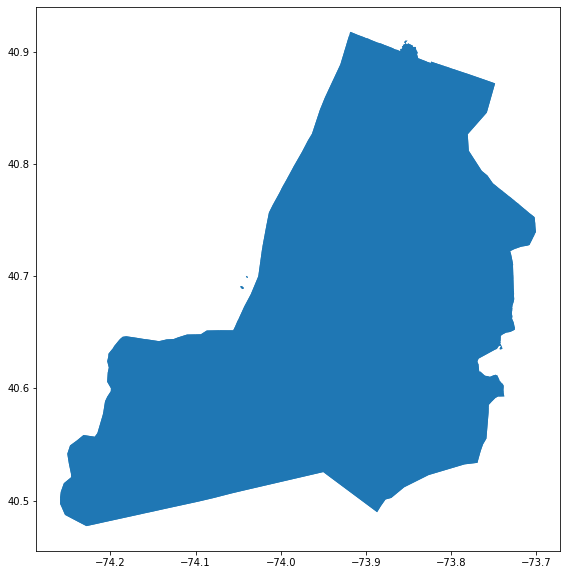

In [10]:
data.plot(figsize=(10,10))

<AxesSubplot:>

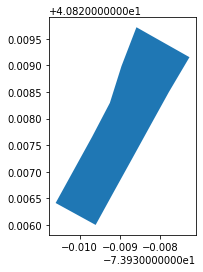

In [11]:
# simgle random census tract
data.sample().plot()

In [17]:
# Geo Data Frame 
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2168 non-null   object  
 1   name              2168 non-null   object  
 2   B03002001         2168 non-null   float64 
 3   B03002001, Error  2168 non-null   float64 
 4   B03002002         2168 non-null   float64 
 5   B03002002, Error  2168 non-null   float64 
 6   B03002003         2168 non-null   float64 
 7   B03002003, Error  2168 non-null   float64 
 8   B03002004         2168 non-null   float64 
 9   B03002004, Error  2168 non-null   float64 
 10  B03002005         2168 non-null   float64 
 11  B03002005, Error  2168 non-null   float64 
 12  B03002006         2168 non-null   float64 
 13  B03002006, Error  2168 non-null   float64 
 14  B03002007         2168 non-null   float64 
 15  B03002007, Error  2168 non-null   float64 
 16  B03002008       

In [18]:
data.geoid.head()

# 1400US census identifier
# 360 county 
# 500010 tract 
# last digit -> block group

0    14000US36005000100
1    14000US36005000200
2    14000US36005000400
3    14000US36005001600
4    14000US36005001900
Name: geoid, dtype: object

In [20]:
data.tail()
# Last row provides summary information, which can cause issues when modeling data


,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
2163,14000US36085031901,"Census Tract 319.01, Richmond, NY",2816.0,438.0,1880.0,455.0,413.0,171.0,1260.0,393.0,...,12.0,235.0,185.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-74.16647 40.62852, -74.16645 ..."
2164,14000US36085031902,"Census Tract 319.02, Richmond, NY",5343.0,640.0,3629.0,540.0,563.0,258.0,2790.0,476.0,...,17.0,326.0,289.0,16.0,25.0,0.0,17.0,16.0,25.0,"MULTIPOLYGON (((-74.17129 40.64052, -74.17118 ..."
2165,14000US36085032300,"Census Tract 323, Richmond, NY",1073.0,144.0,620.0,162.0,186.0,78.0,410.0,144.0,...,12.0,59.0,65.0,70.0,67.0,0.0,12.0,70.0,67.0,"MULTIPOLYGON (((-74.19709 40.63574, -74.19706 ..."
2166,14000US36085990100,"Census Tract 9901, Richmond, NY",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-74.25909 40.49956, -74.25909 ..."
2167,16000US3651000,"New York, NY",8419316.0,0.0,5971454.0,0.0,2702286.0,1453.0,1837549.0,3547.0,...,635.0,1171426.0,13444.0,138570.0,6065.0,69700.0,3739.0,68870.0,4028.0,"MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ..."


In [42]:
data = data.drop([2167])

In [43]:
data.tail()

,geoid,name,Total,Not Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,Percent Not Hispanic or Latinos,Percent Hispanic or Latinos,Percent Not Hispanic Asian,Percent Not Hispanic White,Percent Not Hispanic Black,Percent Not Hispanic Native Hawaiian and Other Pacific Islander,Percent Not Hispanic Some other race,Percent Not Hispanic Two or more races,Percent Not Hispanic Two races including Some other race,"Percent Not Hispanic Two races excluding Some other race, and three or more races"
2162,14000US36085030302,"Census Tract 303.02, Richmond, NY",6702.0,4018.0,1986.0,1015.0,0.0,798.0,0.0,53.0,...,59.952253,40.047747,11.906893,29.632945,15.144733,0.0,0.790809,2.476873,0.0,2.476873
2163,14000US36085031901,"Census Tract 319.01, Richmond, NY",2816.0,1880.0,413.0,1260.0,0.0,207.0,0.0,0.0,...,66.761364,33.238636,7.350852,14.666193,44.744318,0.0,0.000000,0.000000,0.0,0.000000
2164,14000US36085031902,"Census Tract 319.02, Richmond, NY",5343.0,3629.0,563.0,2790.0,0.0,158.0,0.0,0.0,...,67.920644,32.079356,2.957140,10.537151,52.217855,0.0,0.000000,2.208497,0.0,2.208497
2165,14000US36085032300,"Census Tract 323, Richmond, NY",1073.0,620.0,186.0,410.0,0.0,16.0,0.0,8.0,...,57.781920,42.218080,1.491146,17.334576,38.210624,0.0,0.745573,0.000000,0.0,0.000000
2166,14000US36085990100,"Census Tract 9901, Richmond, NY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
list(data)
                

['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races',
 'Hispanic or Latino',
 'Hispanic White',
 'Hispanic Black or African American',
 'Hispanic American Indian and Alaska Native',
 'Hispanic Asian',
 'Hispanic Native Hawaiian and Other Pacific Islander alone',
 'Hispanic Some other race',
 'Hispanic two or more races',
 'Hispanic two races including Some other race',
 'Hispanic two races excluding Some other race, and three or more races',
 'geometry',
 'Percent Not Hispanic or Latinos',
 'Percent Hispanic or Latinos',
 'Percent Not Hispanic Asian',
 'Percent Not Hispanic White',
 'Percent Not Hispanic Black',
 'Percent Not Hispanic Native Hawaiian and Other Pacific Isl

In [15]:
# Defining what columns are valuable to keep 
# Trimming down the data:
col_to_keep = ['geoid', 
                'name',
               'B03002001',
               'B03002002',
               'B03002003',
               'B03002004',
               'B03002005',
               'B03002006',
               'B03002007',
               'B03002008',
               'B03002009',
               'B03002010',
               'B03002011',
               'B03002012',
               'B03002013',
               'B03002014',
               'B03002015',
               'B03002016',
               'B03002017',
               'B03002018',
               'B03002019',
               'B03002020',
               'B03002021',
               'geometry']

               

In [16]:
# Re-defining data: 

data = data[col_to_keep]
list(data)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002010',
 'B03002011',
 'B03002012',
 'B03002013',
 'B03002014',
 'B03002015',
 'B03002016',
 'B03002017',
 'B03002018',
 'B03002019',
 'B03002020',
 'B03002021',
 'geometry']

In [21]:
data.columns = ['geoid', 
                'name', 
                'Total',
                'Not Hispanic or Latino',
                'White alone',
                'Black or African American alone',
                'American Indian and Alaska Native alone',
                'Asian alone',
                'Native Hawaiian and Other Pacific Islander alone',
                'Some other race alone',
                'Two or more races',
                'Two races including Some other race',
                'Two races excluding Some other race, and three or more races',
                'Hispanic or Latino',
                'Hispanic White',
                'Hispanic Black or African American',
                'Hispanic American Indian and Alaska Native',
                'Hispanic Asian',
                'Hispanic Native Hawaiian and Other Pacific Islander alone',
                'Hispanic Some other race',
                'Hispanic two or more races',
                'Hispanic two races including Some other race',
                'Hispanic two races excluding Some other race, and three or more races',
                'geometry']
                
data.head()


,geoid,name,Total,Not Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,Hispanic White,Hispanic Black or African American,Hispanic American Indian and Alaska Native,Hispanic Asian,Hispanic Native Hawaiian and Other Pacific Islander alone,Hispanic Some other race,Hispanic two or more races,Hispanic two races including Some other race,"Hispanic two races excluding Some other race, and three or more races",geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,4457.0,603.0,3601.0,18.0,181.0,0.0,19.0,...,1630.0,223.0,0.0,0.0,0.0,486.0,68.0,0.0,68.0,"MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1088.0,33.0,920.0,0.0,75.0,0.0,60.0,...,1886.0,451.0,0.0,0.0,0.0,936.0,171.0,71.0,100.0,"MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,1855.0,387.0,1264.0,0.0,121.0,0.0,9.0,...,2049.0,413.0,17.0,87.0,0.0,880.0,215.0,50.0,165.0,"MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,2373.0,213.0,2021.0,0.0,64.0,0.0,50.0,...,1671.0,518.0,0.0,12.0,0.0,1079.0,172.0,132.0,40.0,"MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ..."
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,1427.0,340.0,937.0,0.0,72.0,0.0,22.0,...,345.0,186.0,45.0,15.0,0.0,967.0,156.0,127.0,29.0,"MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ..."


In [22]:
# Checking validity of data 
random_tract = data.sample()
random_tract

,geoid,name,Total,Not Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,Hispanic White,Hispanic Black or African American,Hispanic American Indian and Alaska Native,Hispanic Asian,Hispanic Native Hawaiian and Other Pacific Islander alone,Hispanic Some other race,Hispanic two or more races,Hispanic two races including Some other race,"Hispanic two races excluding Some other race, and three or more races",geometry
190,14000US36005026300,"Census Tract 263, Bronx, NY",6218.0,1899.0,544.0,1189.0,109.0,0.0,0.0,24.0,...,1064.0,391.0,0.0,0.0,0.0,2613.0,251.0,124.0,127.0,"MULTIPOLYGON (((-73.90910 40.86300, -73.90880 ..."


In [23]:
random_tract.iloc[0]['Total']

6218.0

In [24]:
# Verifying data:
# Printing Total in that tract

print('Total population: '+ str(random_tract.iloc[0]['Total']))

Total population: 6218.0


In [25]:
# Printing non Hispanic and Hispanic

print('Not Hispanic or Latino: '+ str(random_tract.iloc[0]['Not Hispanic or Latino'])+ '\n Hispanic or Latino: ' + str(random_tract.iloc[0]['Hispanic or Latino']))


Not Hispanic or Latino: 1899.0
 Hispanic or Latino: 4319.0


In [26]:
# Non Hispanic + hispanic should equal the total: 

print('Not Hispanic or Latino + Hispanic or Latino '+ str(random_tract.iloc[0]['Not Hispanic or Latino']+random_tract.iloc[0]['Hispanic or Latino']))


Not Hispanic or Latino + Hispanic or Latino 6218.0


In [27]:
# stat analysis on tracts
data['Total'].describe()

count    2.168000e+03
mean     7.766897e+03
std      1.807508e+05
min      0.000000e+00
25%      2.347000e+03
50%      3.537500e+03
75%      4.941250e+03
max      8.419316e+06
Name: Total, dtype: float64

<AxesSubplot:title={'center':'New York census tract by population size'}, ylabel='Frequency'>

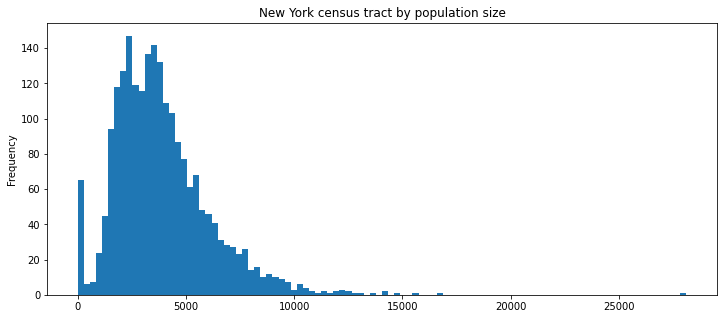

In [45]:
# Creating Histogram for tract population size:

data['Total'].plot.hist(figsize=(12,5), bins = 100, title = 'New York census tract by population size')

<AxesSubplot:title={'center':'New York census tract Non Hispanic or Latino'}, ylabel='Frequency'>

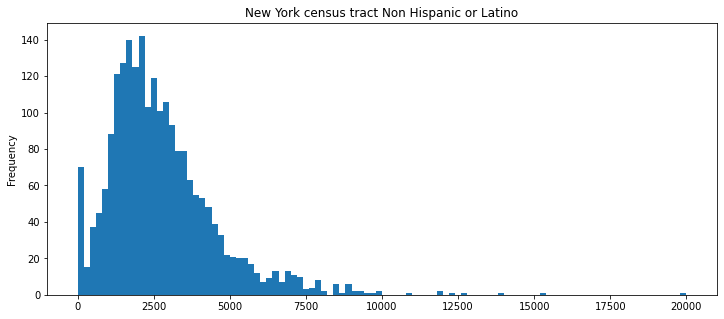

In [46]:
# Creating Histogram for tract Non Hispanic or Latino:

data['Not Hispanic or Latino'].plot.hist(figsize=(12,5), bins = 100, title = 'New York census tract Non Hispanic or Latino')

<AxesSubplot:title={'center':'New York census tract Non Hispanic or Latino'}, ylabel='Frequency'>

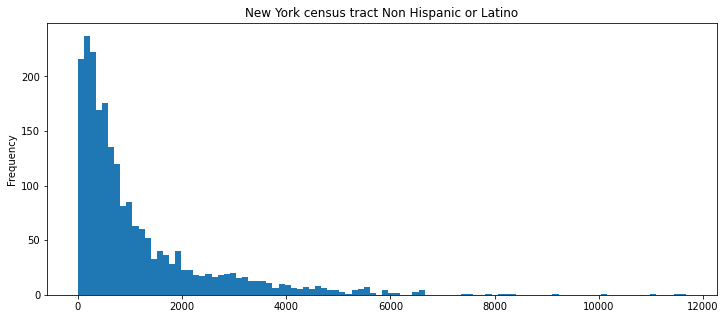

In [68]:
# Creating Histogram for tract Hispanic or Latino:

data['Hispanic or Latino'].plot.hist(figsize=(12,5), bins = 100, title = 'New York census tract Non Hispanic or Latino')

In [47]:
# Sorting and organizing data:

data_sorted = data.sort_values(by = 'Total', ascending = False)
data_sorted.head()

,geoid,name,Total,Not Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,Percent Not Hispanic or Latinos,Percent Hispanic or Latinos,Percent Not Hispanic Asian,Percent Not Hispanic White,Percent Not Hispanic Black,Percent Not Hispanic Native Hawaiian and Other Pacific Islander,Percent Not Hispanic Some other race,Percent Not Hispanic Two or more races,Percent Not Hispanic Two races including Some other race,"Percent Not Hispanic Two races excluding Some other race, and three or more races"
334,14000US36005046201,"Census Tract 462.01, Bronx, NY",28109.0,19999.0,1983.0,16423.0,0.0,876.0,0.0,96.0,...,71.148031,28.851969,3.116440,7.054680,58.426127,0.0,0.341528,2.209257,0.106727,2.102529
1144,14000US36061004400,"Census Tract 44, New York, NY",16594.0,15387.0,12087.0,744.0,0.0,2103.0,0.0,0.0,...,92.726287,7.273713,12.673255,72.839581,4.483548,0.0,0.000000,2.729902,0.000000,2.729902
1236,14000US36061013600,"Census Tract 136, New York, NY",15487.0,13984.0,12628.0,186.0,0.0,1008.0,0.0,0.0,...,90.295086,9.704914,6.508685,81.539356,1.201007,0.0,0.000000,1.046039,0.000000,1.046039
1354,14000US36061024500,"Census Tract 245, New York, NY",14717.0,3210.0,1264.0,1537.0,0.0,339.0,0.0,0.0,...,21.811510,78.188490,2.303459,8.588707,10.443705,0.0,0.000000,0.475640,0.000000,0.475640
1680,14000US36081045500,"Census Tract 455, Queens, NY",14284.0,8952.0,1490.0,4734.0,0.0,2211.0,0.0,5.0,...,62.671521,37.328479,15.478857,10.431252,33.141977,0.0,0.035004,3.584430,0.000000,3.584430


In [48]:
data_sorted[['geoid','Total','Not Hispanic or Latino','Hispanic or Latino']].head(10)

,geoid,Total,Not Hispanic or Latino,Hispanic or Latino
334,14000US36005046201,28109.0,19999.0,8110.0
1144,14000US36061004400,16594.0,15387.0,1207.0
1236,14000US36061013600,15487.0,13984.0,1503.0
1354,14000US36061024500,14717.0,3210.0,11507.0
1680,14000US36081045500,14284.0,8952.0,5332.0
1257,14000US36061015400,14134.0,12614.0,1520.0
1358,14000US36061025300,13572.0,2523.0,11049.0
1362,14000US36061026100,13145.0,1466.0,11679.0
1622,14000US36081033402,12854.0,12353.0,501.0
1226,14000US36061012600,12620.0,11992.0,628.0


<AxesSubplot:>

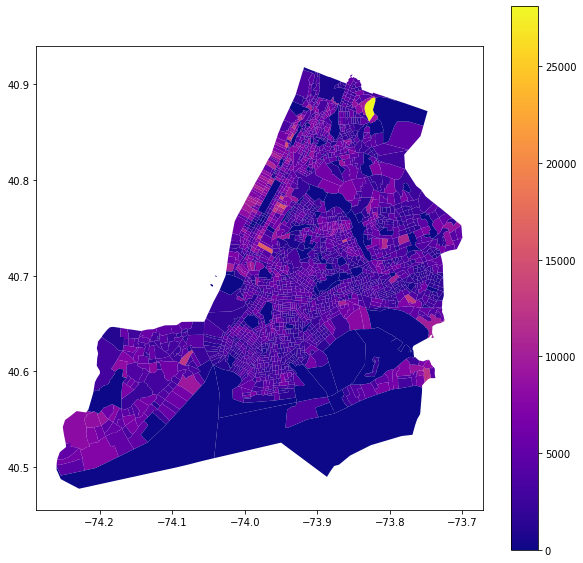

In [49]:
data_sorted.plot(figsize=(10,10), column = 'Total', cmap ='plasma', legend = True)


<AxesSubplot:>

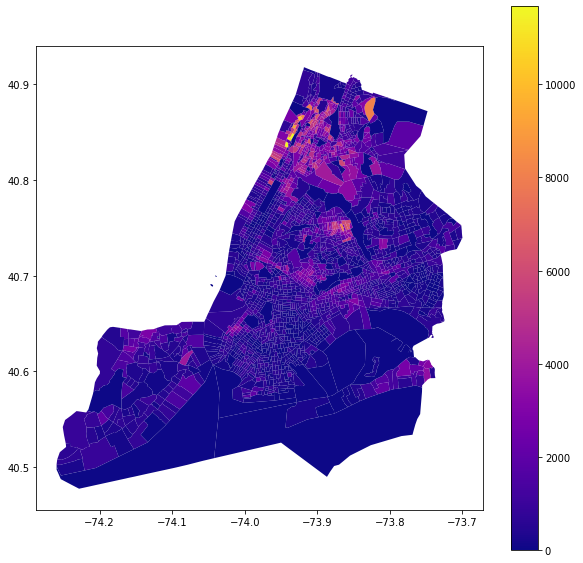

In [50]:
data_sorted.plot(figsize=(10,10), column = 'Hispanic or Latino', cmap ='plasma', legend = True)

In [51]:
# Obtain number of tracts that have no population


no_population_tracts = data[data['Total']==0]
print('There are : '+ str(len(no_population_tracts)) + ' tracts with no population')

There are : 43 tracts with no population


In [52]:
data['Percent Not Hispanic or Latinos'] = (data['Not Hispanic or Latino']/data['Total'])*100
data['Percent Hispanic or Latinos'] = (data['Hispanic or Latino']/data['Total'])*100

data.head()


,geoid,name,Total,Not Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,Percent Not Hispanic or Latinos,Percent Hispanic or Latinos,Percent Not Hispanic Asian,Percent Not Hispanic White,Percent Not Hispanic Black,Percent Not Hispanic Native Hawaiian and Other Pacific Islander,Percent Not Hispanic Some other race,Percent Not Hispanic Two or more races,Percent Not Hispanic Two races including Some other race,"Percent Not Hispanic Two races excluding Some other race, and three or more races"
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,4457.0,603.0,3601.0,18.0,181.0,0.0,19.0,...,64.932984,35.067016,2.636946,8.784965,52.462121,0.0,0.276807,0.509907,0.000000,0.509907
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1088.0,33.0,920.0,0.0,75.0,0.0,60.0,...,24.007061,75.992939,1.654898,0.728155,20.300088,0.0,1.323919,0.000000,0.000000,0.000000
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,1855.0,387.0,1264.0,0.0,121.0,0.0,9.0,...,33.629442,66.370558,2.193619,7.015954,22.915156,0.0,0.163162,1.341552,0.000000,1.341552
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,2373.0,213.0,2021.0,0.0,64.0,0.0,50.0,...,40.738197,59.261803,1.098712,3.656652,34.695279,0.0,0.858369,0.429185,0.000000,0.429185
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,1427.0,340.0,937.0,0.0,72.0,0.0,22.0,...,45.431391,54.568609,2.292264,10.824578,29.831264,0.0,0.700414,1.782872,0.095511,1.687361


,geoid,name,Total,Not Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",geometry,Precent Not Hispanic or Latinos
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,4457.0,603.0,3601.0,18.0,181.0,0.0,19.0,...,223.0,0.0,0.0,0.0,486.0,68.0,0.0,68.0,"MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ...",0.649330
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1088.0,33.0,920.0,0.0,75.0,0.0,60.0,...,451.0,0.0,0.0,0.0,936.0,171.0,71.0,100.0,"MULTIPOLYGON (((-73.86522 40.81453, -73.86425 ...",0.240071
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,1855.0,387.0,1264.0,0.0,121.0,0.0,9.0,...,413.0,17.0,87.0,0.0,880.0,215.0,50.0,165.0,"MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ...",0.336294
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,2373.0,213.0,2021.0,0.0,64.0,0.0,50.0,...,518.0,0.0,12.0,0.0,1079.0,172.0,132.0,40.0,"MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ...",0.407382
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,1427.0,340.0,937.0,0.0,72.0,0.0,22.0,...,186.0,45.0,15.0,0.0,967.0,156.0,127.0,29.0,"MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ...",0.454314


In [53]:
data['Percent Not Hispanic Asian'] = (data['Asian alone']/data['Total'])*100
data['Percent Not Hispanic White'] = (data['White alone']/data['Total'])*100
data['Percent Not Hispanic Black'] = (data['Black or African American alone']/data['Total'])*100
data['Percent Not Hispanic Native Hawaiian and Other Pacific Islander'] = (data['Native Hawaiian and Other Pacific Islander alone']/data['Total'])*100
data['Percent Not Hispanic Some other race'] = (data['Some other race alone']/data['Total'])*100
data['Percent Not Hispanic Two or more races'] = (data['Two or more races']/data['Total'])*100
data['Percent Not Hispanic Two races including Some other race'] = (data['Two races including Some other race']/data['Total'])*100
data['Percent Not Hispanic Two races excluding Some other race, and three or more races'] = (data['Two races excluding Some other race, and three or more races']/data['Total'])*100

data.head()

,geoid,name,Total,Not Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,Percent Not Hispanic or Latinos,Percent Hispanic or Latinos,Percent Not Hispanic Asian,Percent Not Hispanic White,Percent Not Hispanic Black,Percent Not Hispanic Native Hawaiian and Other Pacific Islander,Percent Not Hispanic Some other race,Percent Not Hispanic Two or more races,Percent Not Hispanic Two races including Some other race,"Percent Not Hispanic Two races excluding Some other race, and three or more races"
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,4457.0,603.0,3601.0,18.0,181.0,0.0,19.0,...,64.932984,35.067016,2.636946,8.784965,52.462121,0.0,0.276807,0.509907,0.000000,0.509907
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1088.0,33.0,920.0,0.0,75.0,0.0,60.0,...,24.007061,75.992939,1.654898,0.728155,20.300088,0.0,1.323919,0.000000,0.000000,0.000000
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,1855.0,387.0,1264.0,0.0,121.0,0.0,9.0,...,33.629442,66.370558,2.193619,7.015954,22.915156,0.0,0.163162,1.341552,0.000000,1.341552
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,2373.0,213.0,2021.0,0.0,64.0,0.0,50.0,...,40.738197,59.261803,1.098712,3.656652,34.695279,0.0,0.858369,0.429185,0.000000,0.429185
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,1427.0,340.0,937.0,0.0,72.0,0.0,22.0,...,45.431391,54.568609,2.292264,10.824578,29.831264,0.0,0.700414,1.782872,0.095511,1.687361


<AxesSubplot:>

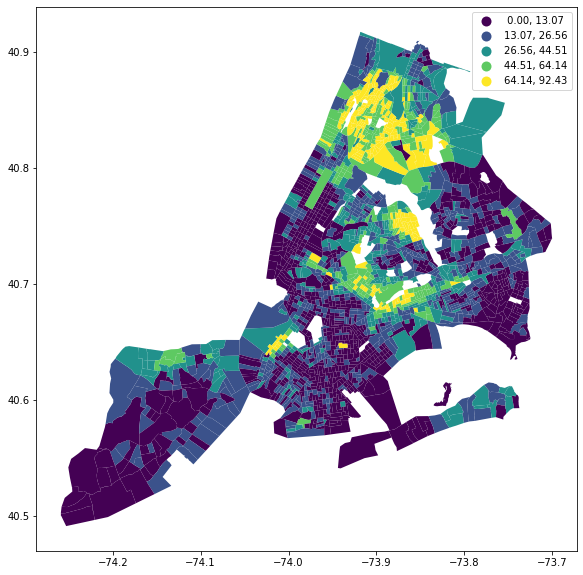

In [54]:
list(data)
data.plot(figsize=(12,10),
          column ='Percent Hispanic or Latinos',
          legend = True,
         scheme = 'NaturalBreaks')


KeyError: 'Percent Hispanic or latino'

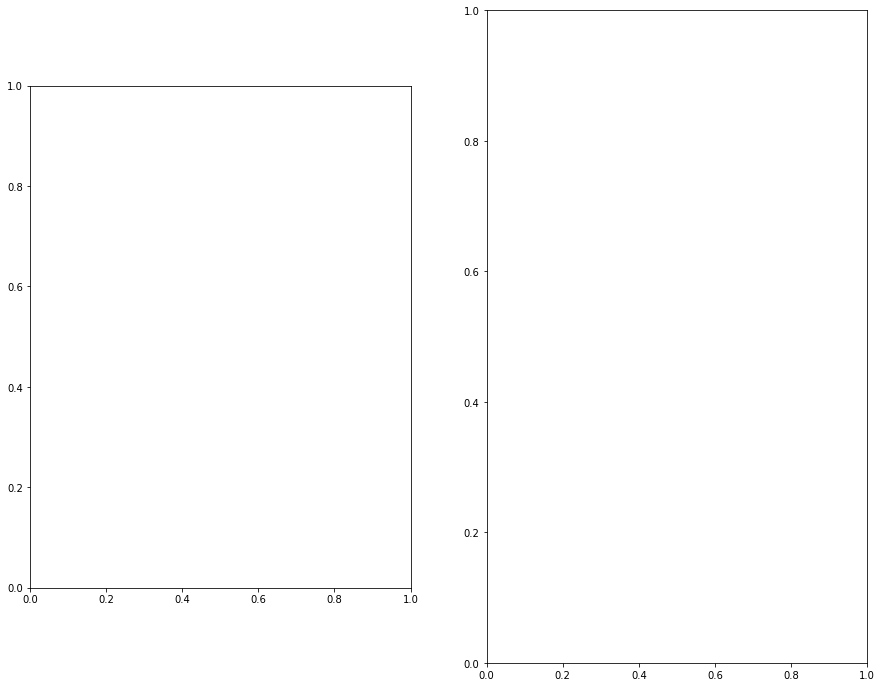

In [56]:
# Declaring sub plot 
fig, axs = plt.subplots(1,2,figsize=(15,12))

# Naming axis
a_1, a_2 = axs

data.plot(column = 'Percent Hispanic or latino',
          cmap = 'RdYlGn_r',
          scheme = 'quantiles',
          k = 5,
          edgecolor = 'white',
          linewidth = 0,
          alpha = 0.75,
          ax = a_1,
          legend = True
         )

a_1.axis("off")
a_1.set_title("Percent Hispanic or Latinos")




data.plot(column = 'Percent Not Hispanic White',
          cmap = 'RdYlGn_r',
          scheme = 'quantiles',
          k = 5,
          edgecolor = 'white',
          linewidth = 0,
          alpha = 0.75,
          ax = a_2,
          legend = True
         )

a_2.axis("off")
a_2.set_title("Percent not Hispanic White")



fig, axs_2 = plt.subplots(1,2,figsize=(15,12))

a_3,a_4 = axs_2
          
data.plot(column = 'Percent Not Hispanic Black',
          cmap = 'RdYlGn_r',
          scheme = 'quantiles',
          k = 5,
          edgecolor = 'white',
          linewidth = 0,
          alpha = 0.75,
          ax = a_3,
          legend = True
         )

a_3.axis("off")
a_3.set_title("Percent not Hispanic Black")
          
          

data.plot(column = 'Percent Not Hispanic Asian',
          cmap = 'RdYlGn_r',
          scheme = 'quantiles',
          k = 5,
          edgecolor = 'white',
          linewidth = 0,
          alpha = 0.75,
          ax = a_4,
          legend = True
         )

a_4.axis("off")
a_4.set_title("Percent not Hispanic Asian")
          




<AxesSubplot:>

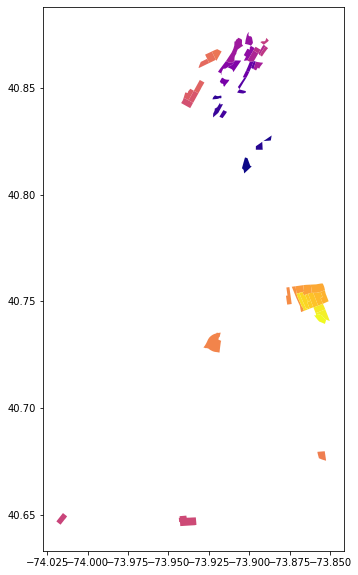

In [209]:
data[data['Percent Hispanic or latino'] > 80].plot(figsize = (12,10), cmap='plasma')

In [223]:
data_web_marcator= data.to_crs(epsg = 3857)
data_web_marcator


,geoid,name,Total,Not Hispanic or Latino,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,Pecent Not Hispanic White,Percent Not Hispanic Asian,Percent Not Hispanic White,Percent Not Hispanic Black,Percent Not Hispanic Native Hawaiian and Other Pacific Islander,Percent Not Hispanic Some other race,Percent Not Hispanic Two or more races,Percent Not Hispanic Two races including Some other race,"Percent Not Hispanic Two races excluding Some other race, and three or more races",Percent Hispanic or Latinos
0,14000US36005000100,"Census Tract 1, Bronx, NY",6864.0,4457.0,603.0,3601.0,18.0,181.0,0.0,19.0,...,2.636946,2.636946,8.784965,52.462121,0.0,0.276807,0.509907,0.000000,0.509907,35.067016
1,14000US36005000200,"Census Tract 2, Bronx, NY",4532.0,1088.0,33.0,920.0,0.0,75.0,0.0,60.0,...,1.654898,1.654898,0.728155,20.300088,0.0,1.323919,0.000000,0.000000,0.000000,75.992939
2,14000US36005000400,"Census Tract 4, Bronx, NY",5516.0,1855.0,387.0,1264.0,0.0,121.0,0.0,9.0,...,2.193619,2.193619,7.015954,22.915156,0.0,0.163162,1.341552,0.000000,1.341552,66.370558
3,14000US36005001600,"Census Tract 16, Bronx, NY",5825.0,2373.0,213.0,2021.0,0.0,64.0,0.0,50.0,...,1.098712,1.098712,3.656652,34.695279,0.0,0.858369,0.429185,0.000000,0.429185,59.261803
4,14000US36005001900,"Census Tract 19, Bronx, NY",3141.0,1427.0,340.0,937.0,0.0,72.0,0.0,22.0,...,2.292264,2.292264,10.824578,29.831264,0.0,0.700414,1.782872,0.095511,1.687361,54.568609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,14000US36085030302,"Census Tract 303.02, Richmond, NY",6702.0,4018.0,1986.0,1015.0,0.0,798.0,0.0,53.0,...,11.906893,11.906893,29.632945,15.144733,0.0,0.790809,2.476873,0.000000,2.476873,40.047747
2163,14000US36085031901,"Census Tract 319.01, Richmond, NY",2816.0,1880.0,413.0,1260.0,0.0,207.0,0.0,0.0,...,7.350852,7.350852,14.666193,44.744318,0.0,0.000000,0.000000,0.000000,0.000000,33.238636
2164,14000US36085031902,"Census Tract 319.02, Richmond, NY",5343.0,3629.0,563.0,2790.0,0.0,158.0,0.0,0.0,...,2.957140,2.957140,10.537151,52.217855,0.0,0.000000,2.208497,0.000000,2.208497,32.079356
2165,14000US36085032300,"Census Tract 323, Richmond, NY",1073.0,620.0,186.0,410.0,0.0,16.0,0.0,8.0,...,1.491146,1.491146,17.334576,38.210624,0.0,0.745573,0.000000,0.000000,0.000000,42.218080


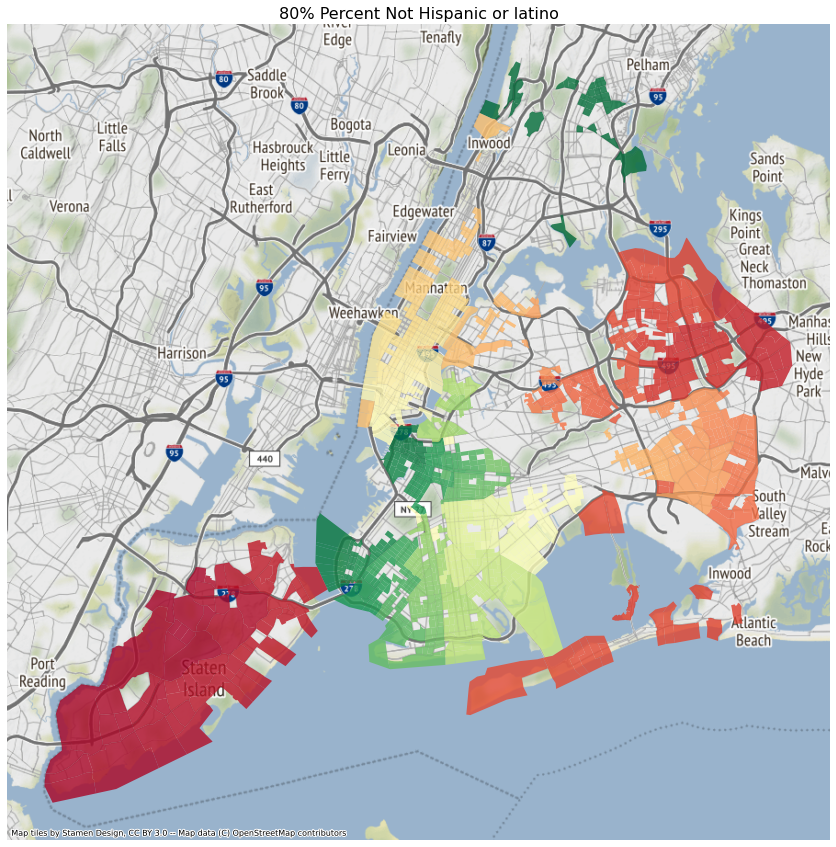

In [289]:
fig, ax_layered = plt.subplots(figsize = (15,15))

data_web_marcator[data_web_marcator['Percent Not Hispanic or Latinos']>80].plot(ax=ax_layered, alpha = 0.8, cmap = 'RdYlGn_r')

ax_layered.axis("off")

ax_layered.set_title('80% Percent Not Hispanic or latino', fontsize=16)

ctx.add_basemap(ax_layered)



KeyError: 'Black or African American alone'

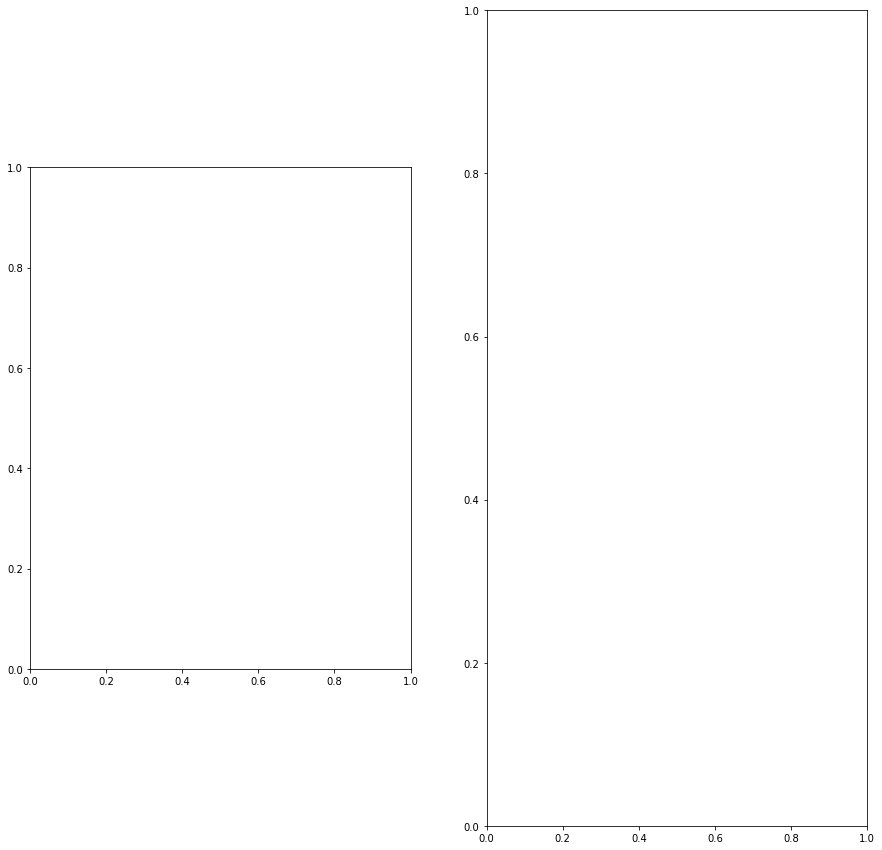

In [8]:
fig, map2 = plt.subplots(1,2,figsize=(15,15))

# Naming axis
a1,a2 = map2

data.plot(column = 'Black or African American alone',
          cmap = 'plasma',
          scheme = 'quantiles',
          k = 5,
          edgecolor = 'white',
          linewidth = 0,
          alpha = 0.75,
          ax = a1,
          legend = True
         )

a1.axis("off")
a1.set_title("Black or African American")




data.plot(column = 'Hispanic Black or African American',
          cmap = 'plasma',
          scheme = 'quantiles',
          k = 5,
          edgecolor = 'white',
          linewidth = 0,
          alpha = 0.75,
          ax = a2,
          legend = True
         )
    
    
a2.axis("off")
a2.set_title("Hispanic Black or African American")